## Regression

## fitting a linear model using SGDRegressor and Ridge Regression

###### Predictive Modeling Example

## Step 1: Import the libraries we will use in this notebook

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

np.random.seed(1) # set this to ensure the results are repeatable. 

# %matplotlib widget 

## Step 2: Load the given data that we will model

In [48]:
df = pd.read_csv('C:/Users/vadla/Downloads/c02_dataset_2.csv')

df.head(3)

,x1,x2,target
0,16.24,-1.53,-12.87
1,-6.12,-24.33,-15.82
2,-5.28,5.08,5.88


Seperate out the input m(X) and the target (y)

In [49]:
X = df[['x1', 'x2']]
y = df[['target']]

For educational purposes, let's look at the first five values in X and y (note how X is an array of lists)

## Step 3: Explore the given data

Often we will do much more than this, but at least look at things using a scatterplot

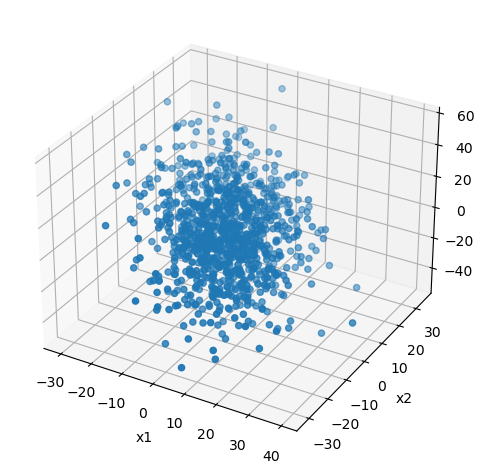

In [50]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['x1'], df['x2'], y)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [51]:
lin_reg = LinearRegression().fit(X,y)

## Step 5: Analyze the linear regression model's performance

Visualize the linear regression model results

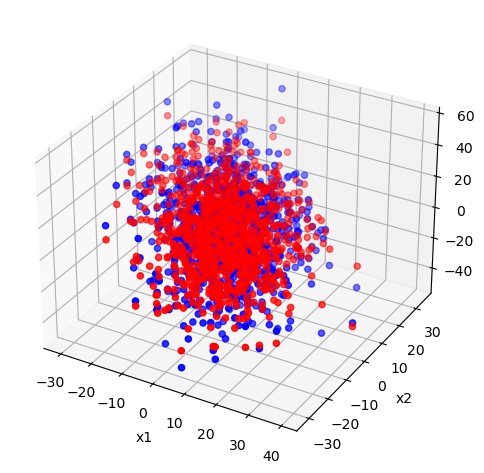

In [52]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X['x1'], X['x2'], y, color='blue')
ax.scatter(X['x1'], X['x2'], lin_reg.predict(X), color='red')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
plt.tight_layout()
plt.show()

... using fstring formatting, we can display these values as follows...

In [53]:
b0 = lin_reg.intercept_[0]
b1 = lin_reg.coef_[0][0]
b2 = lin_reg.coef_[0][1]
r2 = lin_reg.score(X, y)

print(f"Y = {b0:.2f} + {b1:.2f}x1 + {b2:.2f}x2")
print(f"R^2: {r2:.3f}")
print(f"RMSE: {mean_squared_error(y, lin_reg.predict(X))**0.5:.2f}")

Y = -0.19 + -1.05x1 + 0.97x2
R^2: 0.682
RMSE: 9.70


### Here the data set has been split into train set and test set

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=1,test_size=0.3)

### Fitting the SGD Regressor on the training data (X_train) and target values (y_train).


In [55]:
#Stochastic Gradient Descent:
# https://scikit-learn.org/stable/modules/sgd.html
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor


# eta0 = learning rate
# max_iter = number of passes over training data (i.e., epochs)

sgd_reg = SGDRegressor(max_iter=100, penalty=None, eta0=0.05) # see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
sgd_reg.fit(X_train, np.ravel(y_train))

print(f"Number of iterations = {sgd_reg.n_iter_}")

# print(sgd_reg.predict(X_train))

Number of iterations = 26


### Predicting the target variable on the test set by applying the SGD regression model.


In [56]:
#SGD Test RMSE
SGD_test_pred = sgd_reg.predict(X_test)
SGD_test_rmse = np.sqrt(mean_squared_error(y_test, SGD_test_pred))

# rmses = pd.concat([rmses, pd.DataFrame({'model':"SGD", 'rmse': SGD_test_rmse}, index=[0])])

print(f"SGD Test RMSE: {SGD_test_rmse:.3f}")

SGD Test RMSE: 12.161


### Experimented on a linear model with different values of the learning rate (eta) in stochastic gradient descent (SGD)
The results indicates how the choice of learning rate impacted the convergence and performance of the model.

Eta = 0.004 (Learning Rate)
Iterations: 15
RMSE: 10.995
With a small learning rate (eta = 0.004), a rapid convergence and a low RMSE were achieved.

Eta = 0.07 (Learning Rate)
Iterations: 46
RMSE: 11.298
With a larger learning rate (eta = 0.07) resulted in a higher number of iterations and a slightly higher RMSE, might indicate that the  learning rate be too large.

Eta = 0.05 (Learning Rate)
Iterations: 40
RMSE: 13.808
with an intermediate learning rate (eta = 0.05) led to a moderate number of iterations but a higher RMSE, suggesting that it might be too large, which caused the algorithm to overshooting the minimum.

The choice of the learning rate can be considered to be crucial in SGD. Too small a learning rate may cause slow convergence, while too large a learning rate may lead to overshooting and divergence. It is considered to be a standard practice to experiment with different learning rates in order to find the one that provides a good balance between convergence speed and accuracy.

### Applied Stochastic Gradient Descent with Ridge Regression(L2) regularization by fitting a linear model on training data.

In [45]:
#Stochastic Gradient with L2 regularization:

# eta0 = learning rate
# penalty = regularization term
# alphe = regularization strength (lambda)
# max_iter = number of passes over training data (i.e., epochs)

sgd_reg_l2 = SGDRegressor(max_iter=100, penalty='l2', alpha = 0.0002, eta0=0.01)
_ = sgd_reg_l2.fit(X_train, np.ravel(y_train))

print(f"Number of iterations = {sgd_reg_l2.n_iter_}")

Number of iterations = 34


### Evaluate and print the Root Mean Squared Error (RMSE) on the test set for a linear model using Stochastic Gradient Descent (SGD) with L2 regularization.

In [46]:
#Train RMSE
#SGD Test RMSE
SGD_test_pred_l2 = sgd_reg_l2.predict(X_test)
SGD_test_rmse_l2 = np.sqrt(mean_squared_error(y_test, SGD_test_pred_l2))

print(f"SGD Test with l2 RMSE: {SGD_test_rmse_l2:.3f}")

SGD Test with l2 RMSE: 11.041


## Applied stochastic gradient descent (SGD) with L2 regularization on a linear model and experimented with different values of the regularization parameter (alpha). Interpretation of your results are shown below:

Alpha = 0.03 (L2 Regularization Parameter)
Iterations: 29
RMSE: 11.280
More iterations resulted from stronger regularization, perhaps because the increasing penalty on big parameter values limited updates to the model parameters.

Alpha = 0.004 (L2 Regularization Parameter)
Iterations: 11
RMSE: 11.648
A smaller regularization parameter (alpha = 0.004) led to a quicker convergence with fewer iterations (11), but it resulted in a higher RMSE of 11.648. This implies that the regularization was insufficient to stop overfitting, which resulted in a somewhat lower performance when compared to alpha values with higher values.

Alpha = 0.0002 (L2 Regularization Parameter)
Iterations: 34
RMSE: 11.041
Although the model took more iterations (34) to converge with a relatively small regularization parameter (alpha = 0.0002), it produced the lowest RMSE of 11.041. This suggests that there was little regularization, which enabled the model to get closer to the training set and produce superior RMSE results.

The regularization parameter (alpha) has the capacity to significantly impact the regularization on the model. Higher values of alpha would opt a stronger regularization, which could lead to smoother models but may require more iterations to converge. Lower values of alpha reduce the regularization effect, allowing the model to fit the training data more closely but may increase the risk of overfitting. Experimenting with different values of alpha helps find the optimal balance for the specific dataset and model. Here 0.004 is seeming to provide a good balance between convergence speed and model accuracy in this scenario.